# Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import gc

from dateutil.relativedelta import relativedelta


# Take a look at data

In [2]:
path_data = "Stack Overflow Developer Survey 2017"

data_raw = pd.read_csv(f"{path_data}/survey_results_public.csv")
data_schema = pd.read_csv(f"{path_data}/survey_results_schema.csv")

In [3]:
data_raw.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_raw.columns.tolist()

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

In [5]:
data_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


# Question 1: 
### Which location between North America and Europe have higher average salary for software developers?

In [6]:
# In this case we need to compare North America to Europe so that we need a 'Region' column
# Define dictionaries to map country to region
data = data_raw.copy()
region_map = {
    'Liechtenstein': 'Europe',
    'Switzerland': 'Europe',
    'Iceland': 'Europe',
    'Norway': 'Europe',
    'Denmark': 'Europe',
    'Ireland': 'Europe',
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'Netherlands': 'Europe',
    'Sweden': 'Europe',
    'Luxembourg': 'Europe',
    'Austria': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Belgium': 'Europe',
    'Spain': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'United States': 'North_America',
    'Canada': 'North_America'
}

# Add new column to indicate region
data['Region'] = data['Country'].map(region_map).fillna('Other')

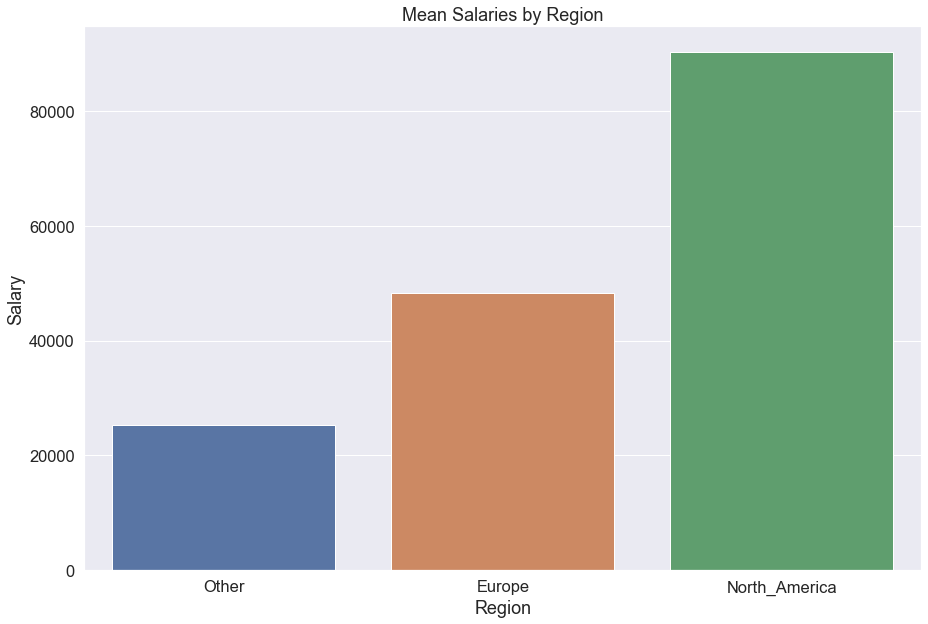

In [7]:
# Filter out rows where 'Salary' is null
salary = data[data['Salary'].notnull()]

# Select columns of interest
salary = salary[['Country', 'YearsCodedJob', 'FormalEducation', 'Salary', 'Region']]

# Group by 'Region' and calculate the median of 'Salary'
salary_plot = salary.groupby('Region')['Salary'].mean().reset_index()
salary_plot = salary_plot.sort_values(by='Salary')

# Visualize the median salaries by region using a bar plot
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.barplot(x='Region', y='Salary', data=salary_plot)
plt.title('Mean Salaries by Region')
plt.show()


### - According to above chart, we can clearly see that software developer at North America has average salary higher than than those in Europe.
### - We will continue to analyze how the FormalEducation data field affects wages in the two regions mentioned above.

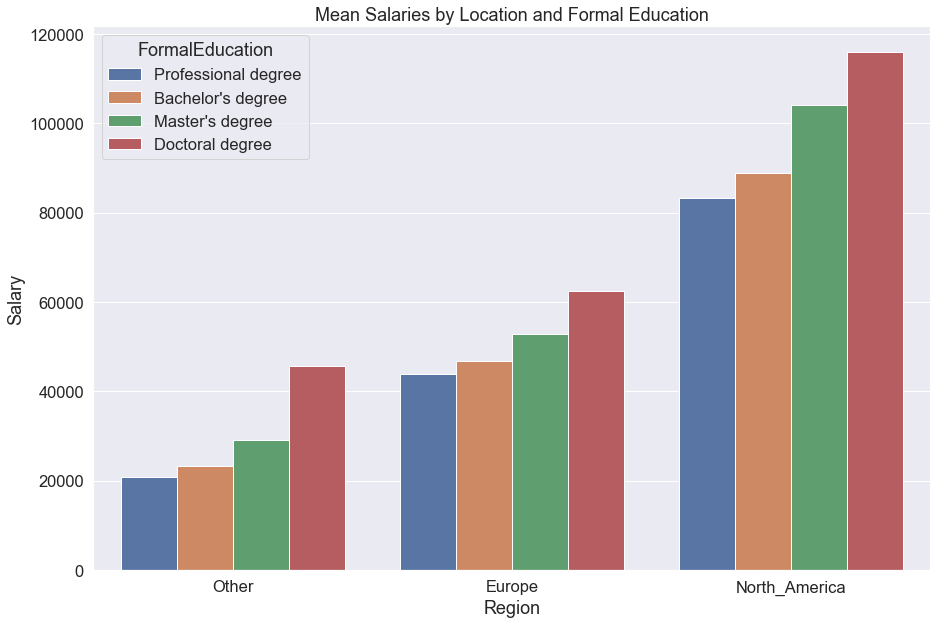

In [8]:
# Filter by education level
education_levels = ["Bachelor's degree", "Master's degree", 'Doctoral degree', 'Professional degree']
salary_academics_plot = (
    salary.loc[salary['FormalEducation'].isin(education_levels)]
    .groupby(['Region', 'FormalEducation'])['Salary']
    .mean()
    .reset_index()
)
salary_academics_plot = salary_academics_plot.sort_values(by='Salary')

# Visualize with a bar plot
sns.set(font_scale=1.5)
plt.figure(figsize=(15, 10))
sns.barplot(x='Region', y='Salary', hue='FormalEducation', data=salary_academics_plot)
plt.title('Mean Salaries by Location and Formal Education')
plt.show()


### - As can be seen from above chart, it seems like have higher education will earn you a higher wage in North America in 2017.

## Question 2: 
### Which location between North America and Europe have the higher ratio of salary growth?

Text(0.5, 0, 'Years of Experience')

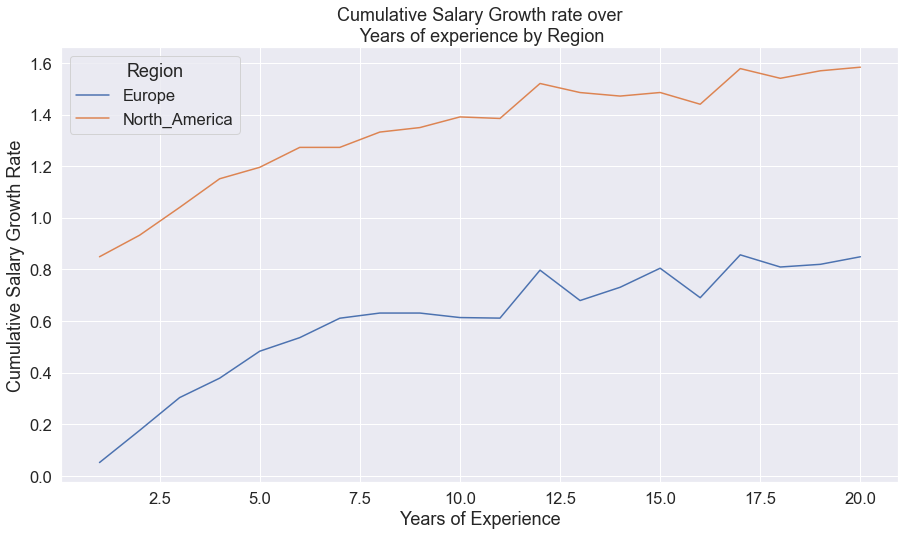

In [9]:
# Filter out rows where 'Salary' is null
salary = data[data['Salary'].notnull()]

# Filter out rows where 'Region' is 'Other'
salary = salary[salary['Region']!="Other"]

# create a dictionary to transform years to numeric values
year_dict = {'Less than a year': 0,
             '1 to 2 years': 1,
             '2 to 3 years': 2,
             '3 to 4 years': 3,
             '4 to 5 years': 4,
             '5 to 6 years': 5,
             '6 to 7 years': 6,
             '7 to 8 years': 7,
             '8 to 9 years': 8,
             '9 to 10 years': 9,
             '10 to 11 years': 10,
             '11 to 12 years': 11,
             '12 to 13 years': 12,
             '13 to 14 years': 13,
             '14 to 15 years': 14,
             '15 to 16 years': 15,
             '16 to 17 years': 16,
             '17 to 18 years': 17,
             '18 to 19 years': 18,
             '19 to 20 years': 19,
             '20 or more years': 20}

# replace years with their numeric equivalent
salary['YearsCodedJob'] = salary['YearsCodedJob'].replace(year_dict)
salary['YearsCodedJob'] = pd.to_numeric(salary['YearsCodedJob'])

# drop rows where YearsCodedJob is null
salary_years = salary[['YearsCodedJob', 'Salary', 'Region']].dropna(subset=['YearsCodedJob'])

# compute the median salary for each region and years of experience
salary_years = salary_years.groupby(['Region', 'YearsCodedJob'])['Salary'].median().reset_index()

# compute the cumulative change rate for each region
salary_years['change'] = salary_years.groupby('Region')['Salary'].pct_change().cumsum()

# remove rows where YearsCodedJob is zero
salary_years = salary_years[salary_years['YearsCodedJob'] != 0]

# plot the cumulative salary growth rate over years of experience by region
sns.set(font_scale=1.5)
plt.figure(figsize=(15, 8))
sns.lineplot(x='YearsCodedJob', y='change', hue='Region', data=salary_years)
plt.title('Cumulative Salary Growth rate over\n Years of experience by Region')
plt.ylabel('Cumulative Salary Growth Rate')
plt.xlabel('Years of Experience')


### - We can clearly see that the total rate of wage growth in both places is comparable.

## Question 3: 
### Which location between North America and Europe have the higher job satisfaction?

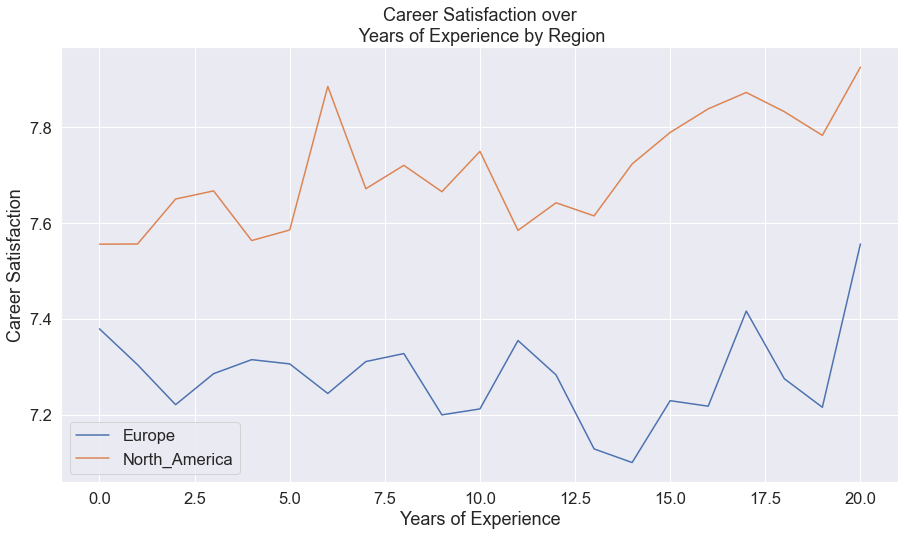

In [10]:
# Filter out rows where 'CareerSatisfaction' is null or 'Region' is 'Other'
career_satisfaction = data[data['CareerSatisfaction'].notnull() & (data['Region'] != 'Other')]

# Select columns of interest
career_satisfaction = career_satisfaction[['YearsCodedJob', 'CareerSatisfaction','Region']]

# create a dictionary to transform years to numeric values
year_dict = {'Less than a year': 0,
             '1 to 2 years': 1,
             '2 to 3 years': 2,
             '3 to 4 years': 3,
             '4 to 5 years': 4,
             '5 to 6 years': 5,
             '6 to 7 years': 6,
             '7 to 8 years': 7,
             '8 to 9 years': 8,
             '9 to 10 years': 9,
             '10 to 11 years': 10,
             '11 to 12 years': 11,
             '12 to 13 years': 12,
             '13 to 14 years': 13,
             '14 to 15 years': 14,
             '15 to 16 years': 15,
             '16 to 17 years': 16,
             '17 to 18 years': 17,
             '18 to 19 years': 18,
             '19 to 20 years': 19,
             '20 or more years': 20}

# replace years with their numeric equivalent
career_satisfaction['YearsCodedJob'] = career_satisfaction['YearsCodedJob'].replace(year_dict)
career_satisfaction['YearsCodedJob'] = pd.to_numeric(career_satisfaction['YearsCodedJob'])

# Compute the mean career satisfaction for each region and years of experience
career_satisfaction = career_satisfaction.groupby(['Region','YearsCodedJob'])['CareerSatisfaction'].mean().reset_index()

# Set plot parameters
sns.set(font_scale=1.5)
plt.figure(figsize=(15, 8))

# Create line plot
sns.lineplot(x="YearsCodedJob", y="CareerSatisfaction", hue="Region", data=career_satisfaction)

# Set plot titles and labels
plt.title('Career Satisfaction over\n Years of Experience by Region')
plt.ylabel('Career Satisfaction')
plt.xlabel('Years of Experience')
plt.legend(loc=3)

### - Overall, we can see that the change in job satisfaction over time is quite similar, but the job satisfaction level is higher in North America than in Europe. And in both regions, there seems to be a trend towards increased job satisfaction with those who spend more time in programming jobs.